In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

## Loading the CSV Data

In [3]:
df = pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Analysis 

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.drop(['url', 'address', 'menu_item', 'dish_liked', 'reviews_list'], axis=1, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   phone                        50509 non-null  object
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


### dropping duplicates

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(51621, 12)

### Cleaning the rate column

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def handle_rate(value):
    if(value=="NEW" or value=="-"):
        return np.nan
    else:
        value = str(value).split("/")
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handle_rate)
df['rate'][:5]

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Checking for the presence of null values

In [11]:
df.rate.isnull().sum()

10023

### Filling the null values with the mean

In [12]:
df['rate'].fillna(df['rate'].mean(), inplace=True)
df.rate.isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51621 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51621 non-null  object 
 1   online_order                 51621 non-null  object 
 2   book_table                   51621 non-null  object 
 3   rate                         51621 non-null  float64
 4   votes                        51621 non-null  int64  
 5   phone                        50416 non-null  object 
 6   location                     51600 non-null  object 
 7   rest_type                    51394 non-null  object 
 8   cuisines                     51576 non-null  object 
 9   approx_cost(for two people)  51277 non-null  object 
 10  listed_in(type)              51621 non-null  object 
 11  listed_in(city)              51621 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.1+ MB


### Dropping Null Values and Renaming Columns

In [14]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [15]:
df.rename(columns={'approx_cost(for two people)': "cost2plates",
                   'listed_in(type)': 'type',
                   'listed_in(city)': 'city'},
         inplace=True)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type,city
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old 

In [17]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Elements in location and city both are similar so let's keep one

In [18]:
df.drop(['city'], axis=1, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [19]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Removing , from cost2plates values

In [20]:
def handle_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(",", "")
        return float(value)
    else:
        return float(value)
    
df['cost2plates'] = df['cost2plates'].apply(handle_comma)
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [21]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


### Cleaning rest_type column

In [22]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   18600
Casual Dining                 10216
Cafe                           3605
Delivery                       2510
Dessert Parlor                 2200
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Bakery, Food Court                1
Name: count, Length: 91, dtype: int64

In [23]:
rest_types = df.rest_type.value_counts()
rest_types

rest_type
Quick Bites                   18600
Casual Dining                 10216
Cafe                           3605
Delivery                       2510
Dessert Parlor                 2200
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Bakery, Food Court                1
Name: count, Length: 91, dtype: int64

In [24]:
rest_types_lessthan_1000 = rest_types[rest_types < 1000]
rest_types_lessthan_1000

rest_type
Beverage Shop                 844
Bar                           676
Food Court                    576
Sweet Shop                    465
Bar, Casual Dining            403
                             ... 
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Bakery, Food Court              1
Name: count, Length: 83, dtype: int64

Making the rest_type less than 1000 in frequency as `others`

In [25]:
def handle_rest_type(value):
    if value in rest_types_lessthan_1000:
        return 'others'
    else:
        return value
df['rest_type'] = df.rest_type.apply(handle_rest_type)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [26]:
df.rest_type.value_counts()

rest_type
Quick Bites           18600
Casual Dining         10216
others                 8835
Cafe                   3605
Delivery               2510
Dessert Parlor         2200
Takeaway, Delivery     1975
Casual Dining, Bar     1125
Bakery                 1120
Name: count, dtype: int64

### Cleaning the Location Column

In [27]:
location = df.location.value_counts()
location

location
BTM                      4966
HSR                      2477
Koramangala 5th Block    2445
JP Nagar                 2199
Whitefield               2076
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [28]:
location_lessthan_300 = location[location < 300]
location_lessthan_300

location
Koramangala 8th Block            294
Vasanth Nagar                    290
Jeevan Bhima Nagar               268
Wilson Garden                    244
Bommanahalli                     235
Koramangala 3rd Block            215
Kumaraswamy Layout               191
Thippasandra                     189
Basaveshwara Nagar               186
Nagawara                         184
Seshadripuram                    165
Hennur                           158
Infantry Road                    150
HBR Layout                       147
Majestic                         145
Race Course Road                 135
Yeshwantpur                      119
City Market                      118
ITPL Main Road, Whitefield       113
Koramangala 2nd Block            102
Kaggadasapura                    100
Varthur Main Road, Whitefield     98
Hosur Road                        98
South Bangalore                   94
CV Raman Nagar                    88
Vijay Nagar                       78
Sanjay Nagar                 

In [29]:
def handle_location(value):
    if value in location_lessthan_300:
        return "others"
    else:
        return value
    
df['location'] = df.location.apply(handle_location)
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [30]:
df.location.value_counts()

location
BTM                      4966
others                   4871
HSR                      2477
Koramangala 5th Block    2445
JP Nagar                 2199
Whitefield               2076
Indiranagar              1996
Jayanagar                1872
Marathahalli             1783
Bannerghatta Road        1589
Koramangala 1st Block    1235
Bellandur                1234
Electronic City          1233
Brigade Road             1188
Koramangala 7th Block    1132
Koramangala 6th Block    1114
Sarjapur Road            1042
Koramangala 4th Block     994
Ulsoor                    989
Banashankari              896
MG Road                   875
Kalyan Nagar              834
Richmond Road             746
Malleshwaram              703
Residency Road            672
Basavanagudi              669
Frazer Town               665
Brookefield               652
New BEL Road              641
Kammanahalli              634
Banaswadi                 622
Rajajinagar               584
Church Street             550
L

### Cleaning Cuisines Column

In [31]:
cuisine = df.cuisines.value_counts()
cuisine

cuisines
North Indian                                   2769
North Indian, Chinese                          2345
South Indian                                   1739
Bakery, Desserts                                887
Biryani                                         887
                                               ... 
North Indian, Biryani, Asian                      1
Andhra, North Indian, Chinese, South Indian       1
South Indian, Mangalorean, Chinese                1
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Arabian, Momos             1
Name: count, Length: 2686, dtype: int64

In [32]:
cuisines_lessthan_100 = cuisine[cuisine < 100]
cuisines_lessthan_100

cuisines
North Indian, Continental, Chinese             97
Italian, Pizza                                 93
Juices                                         93
Fast Food, North Indian                        93
Tibetan, Momos                                 90
                                               ..
North Indian, Biryani, Asian                    1
Andhra, North Indian, Chinese, South Indian     1
South Indian, Mangalorean, Chinese              1
North Indian, Chinese, South Indian, Juices     1
North Indian, Chinese, Arabian, Momos           1
Name: count, Length: 2618, dtype: int64

In [33]:
def handle_cuisines(value):
    if value in cuisines_lessthan_100:
        return "others"
    else:
        return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df.cuisines.value_counts()

cuisines
others                                 25910
North Indian                            2769
North Indian, Chinese                   2345
South Indian                            1739
Biryani                                  887
                                       ...  
Cafe, Desserts                           104
North Indian, Mughlai, Chinese           104
South Indian, Chinese, North Indian      104
South Indian, Fast Food                  102
North Indian, Chinese, Seafood           102
Name: count, Length: 69, dtype: int64

In [34]:
df.head()

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,others,600.0,Buffet


In [35]:
df.type.value_counts()

type
Delivery              25208
Dine-out              17249
Desserts               3457
Cafes                  1663
Drinks & nightlife     1070
Buffet                  868
Pubs and bars           671
Name: count, dtype: int64

## Visualization

### Count Plot of Various Locations

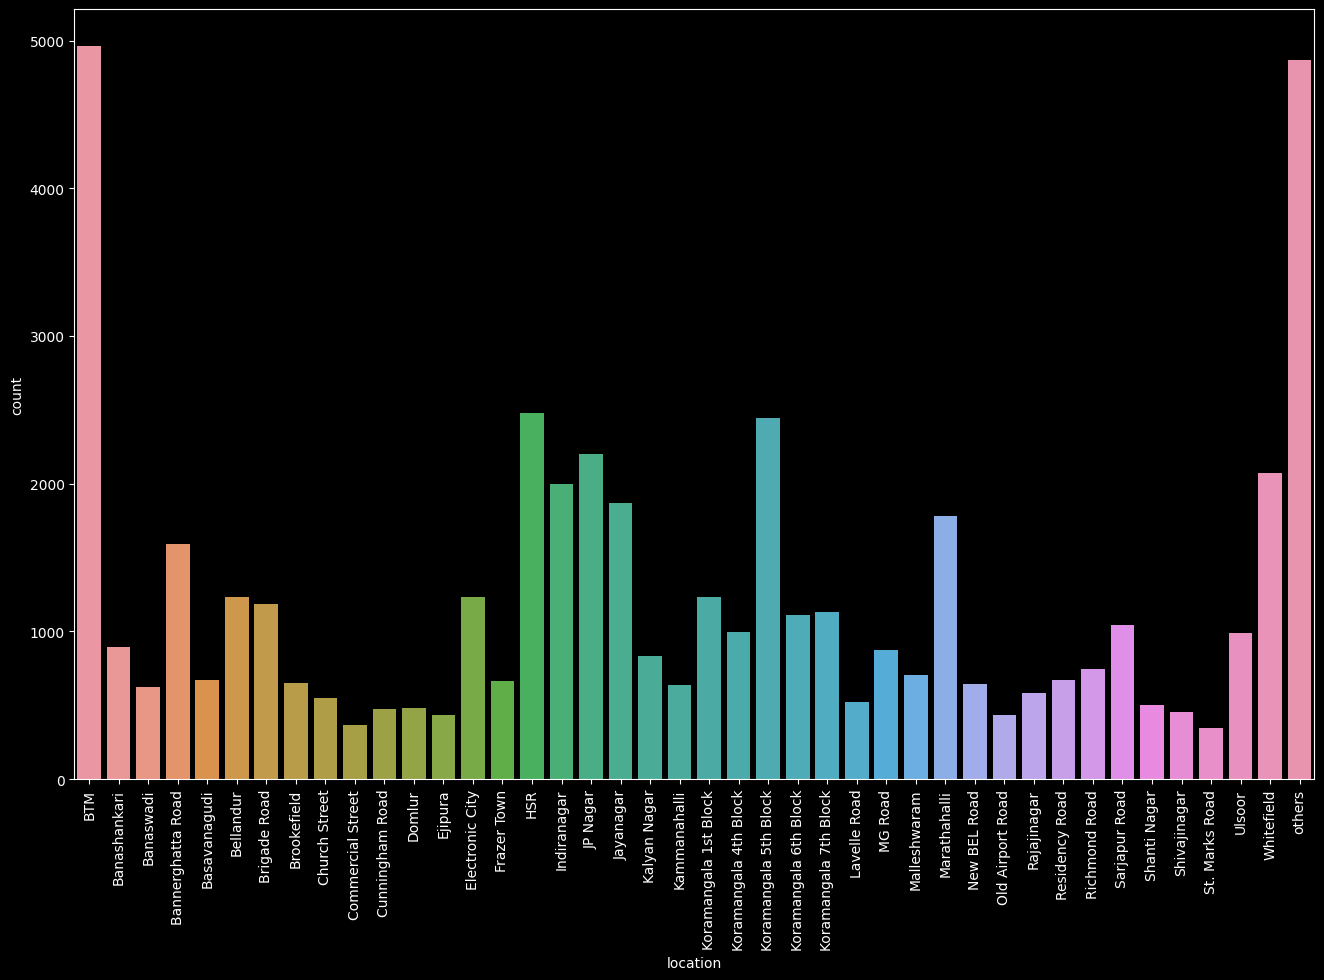

In [36]:
plt.figure(figsize=(16, 10))
df['location'] = pd.Categorical(df['location'])
sns.countplot(x='location', data=df)
plt.xticks(rotation=90);

### Visualizing Online Orders

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50186 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          50186 non-null  object  
 1   online_order  50186 non-null  object  
 2   book_table    50186 non-null  object  
 3   rate          50186 non-null  float64 
 4   votes         50186 non-null  int64   
 5   phone         50186 non-null  object  
 6   location      50186 non-null  category
 7   rest_type     50186 non-null  object  
 8   cuisines      50186 non-null  object  
 9   cost2plates   50186 non-null  float64 
 10  type          50186 non-null  object  
dtypes: category(1), float64(2), int64(1), object(7)
memory usage: 4.3+ MB


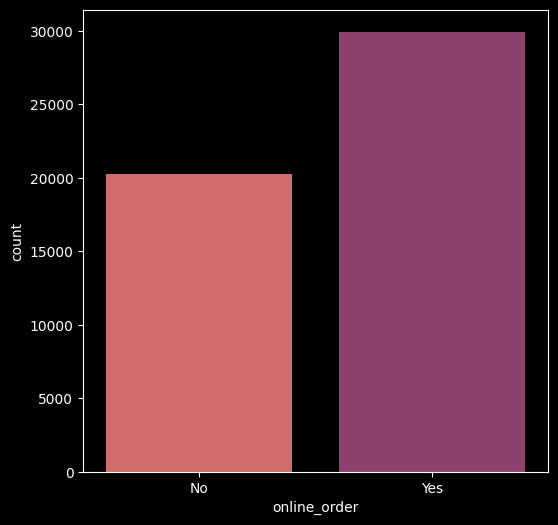

In [38]:
plt.figure(figsize=(6, 6))
df['online_order'] = pd.Categorical(df['online_order'])
sns.countplot(x='online_order', data=df, palette='flare');

### Visualizing book table facilty

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50186 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          50186 non-null  object  
 1   online_order  50186 non-null  category
 2   book_table    50186 non-null  object  
 3   rate          50186 non-null  float64 
 4   votes         50186 non-null  int64   
 5   phone         50186 non-null  object  
 6   location      50186 non-null  category
 7   rest_type     50186 non-null  object  
 8   cuisines      50186 non-null  object  
 9   cost2plates   50186 non-null  float64 
 10  type          50186 non-null  object  
dtypes: category(2), float64(2), int64(1), object(6)
memory usage: 3.9+ MB


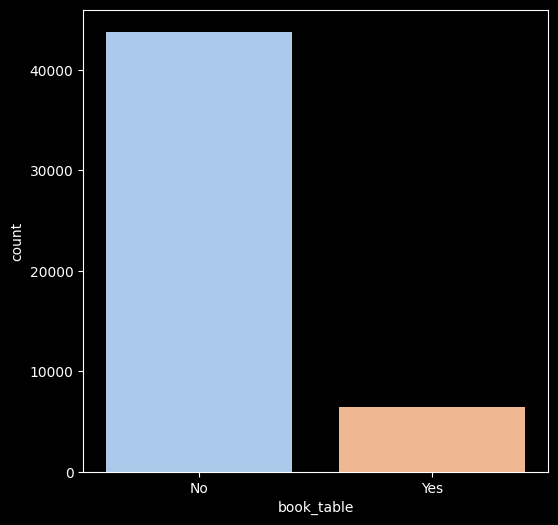

In [40]:
plt.figure(figsize=(6, 6))
df['book_table'] = pd.Categorical(df['book_table'])
sns.countplot(x='book_table', data=df, palette='pastel');

### Visualizing Online order vs Rate

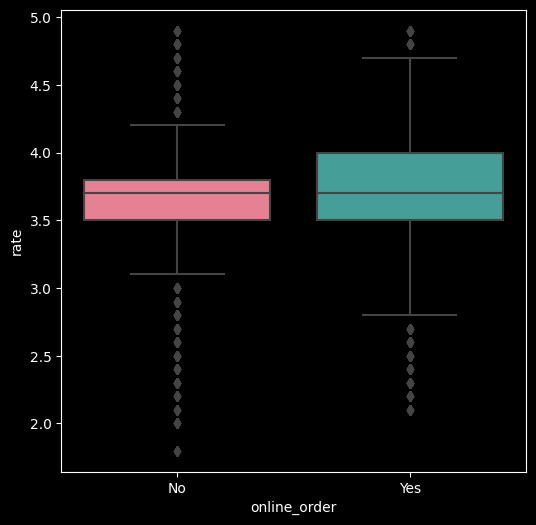

In [41]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df, palette='husl');

### Visualizing Book table vs Rate

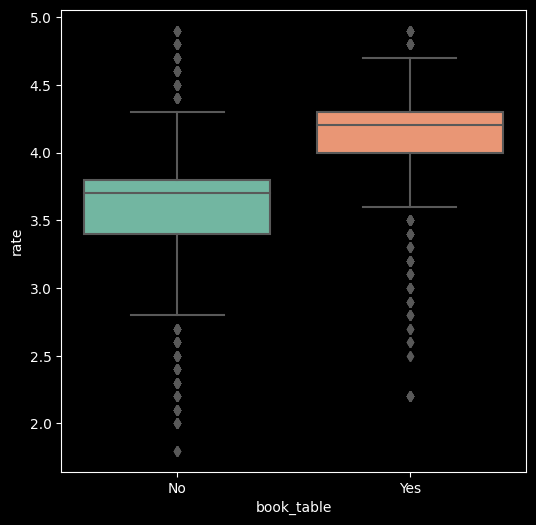

In [42]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='book_table', y='rate', data=df, palette='Set2');

### Visualizing online order facility, location wise

In [43]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1721  3245
Banashankari            391   505
Banaswadi               288   334
Bannerghatta Road       669   920
Basavanagudi            235   434
Bellandur               495   739
Brigade Road            534   654
Brookefield             239   413
Church Street           209   341
Commercial Street       227   142
Cunningham Road         161   313
Domlur                  247   235
Ejipura                 214   219
Electronic City         665   568
Frazer Town             254   411
HSR                     572  1905
Indiranagar             677  1319
JP Nagar                896  1303
Jayanagar               523  1349
Kalyan Nagar            343   491
Kammanahalli            259   375
Koramangala 1st Block   384   851
Koramangala 4th Block   448   546
Koramangala 5th Block   836  1609
Koramangala 6th Block   433   681
Koramangala 7th Block   358   774
Lavelle Road            314   205
MG Road                 502   373
Malleshwaram            301   402
Marathahalli            690  1093
New BEL Road            255   386
Old Airport Road        220   212
Rajajinagar             281   303
Residency Road          424   248
Richmond Road           510   236
Sarjapur Road           320   722
Shanti Nagar            279   220
Shivajinagar            319   138
St. Marks Road          176   167
Ulsoor                  379   610
Whitefield              969  1107
others                 2011  2860

<Axes: xlabel='location'>

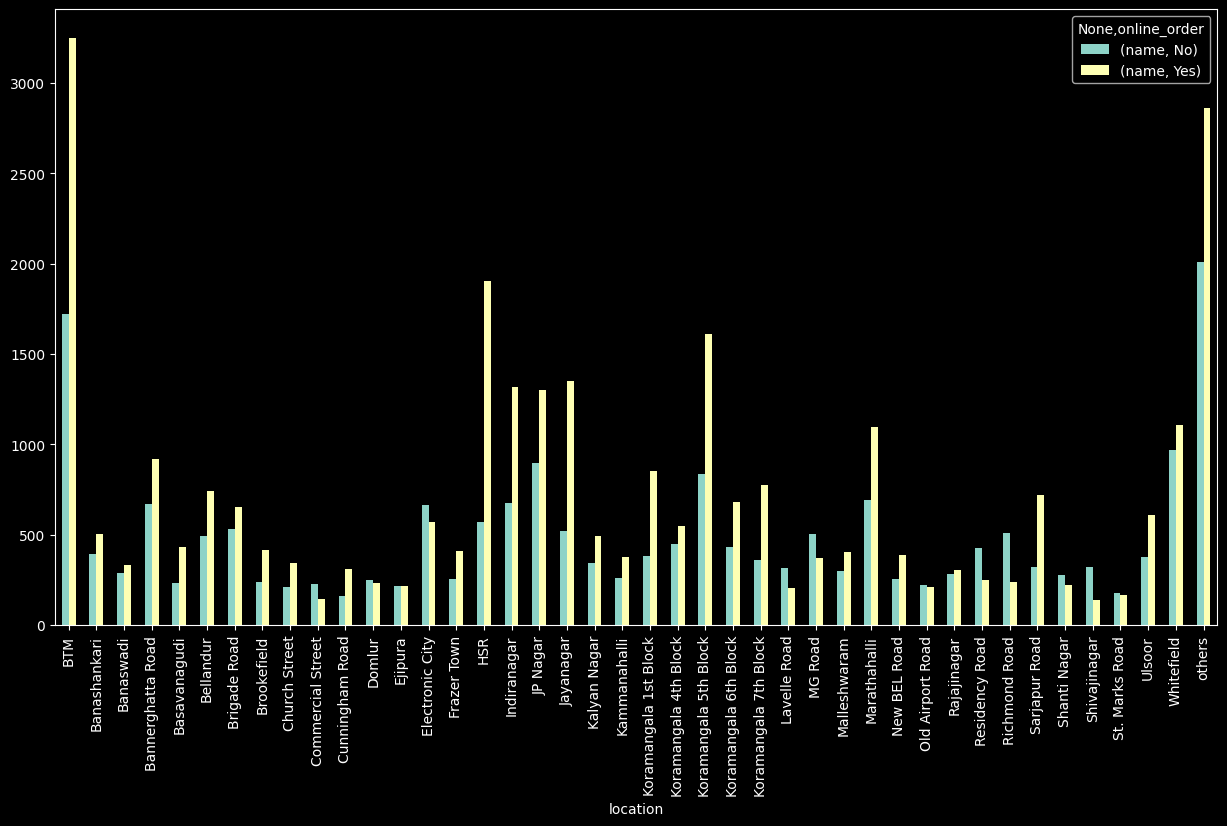

In [44]:
df1.plot(kind = 'bar', figsize = (15,8))

### Visualizing Booking Table facility, Location wise

In [45]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4799  167
Banashankari            833   63
Banaswadi               614    8
Bannerghatta Road      1490   99
Basavanagudi            653   16
Bellandur              1136   98
Brigade Road           1012  176
Brookefield             578   74
Church Street           368  182
Commercial Street       369    0
Cunningham Road         299  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1135   98
Frazer Town             657    8
HSR                    2260  217
Indiranagar            1547  449
JP Nagar               1884  315
Jayanagar              1593  279
Kalyan Nagar            685  149
Kammanahalli            585   49
Koramangala 1st Block  1185   50
Koramangala 4th Block   684  310
Koramangala 5th Block  1753  692
Koramangala 6th Block  1002  112
Koramangala 7th Block   970  162
Lavelle Road            289  230
MG Road                 534  341
Malleshwaram            614   89
Marathahalli           1620  163
New BEL Road            585   56
Old Airport Road        373   59
Rajajinagar             543   41
Residency Road          523  149
Richmond Road           630  116
Sarjapur Road           888  154
Shanti Nagar            442   57
Shivajinagar            434   23
St. Marks Road          219  124
Ulsoor                  812  177
Whitefield             1825  251
others                 4504  367

<Axes: xlabel='location'>

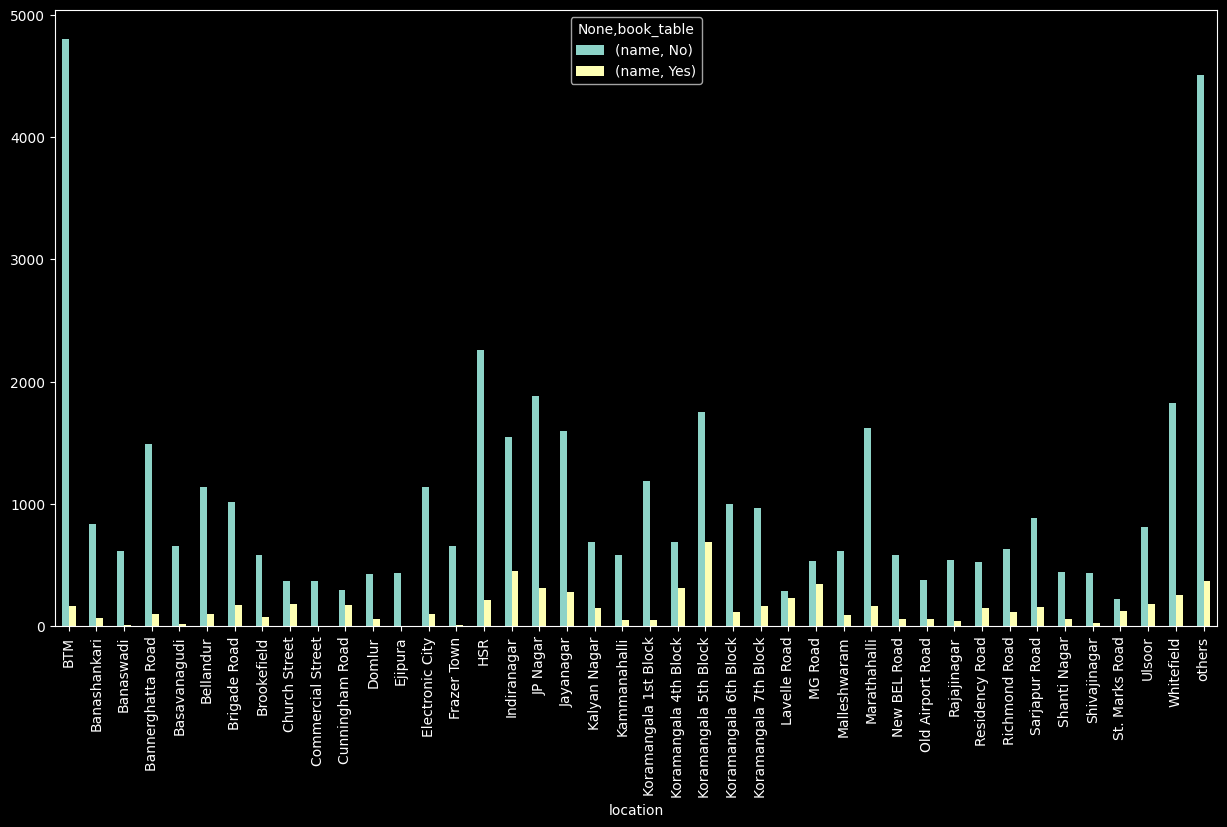

In [46]:
df2.plot(kind = 'bar', figsize = (15,8))

### Grouping Types of Restaurants Location Wise

In [48]:
df3 = df.groupby(['location','type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3003      190     1628   
Banashankari               7    36      417       71      351   
Banaswadi                  0    24      301       32      258   
Bannerghatta Road          9    45      824      132      568   
Basavanagudi               7    11      337       66      243   
Bellandur                 28    35      603       69      466   
Brigade Road              25    46      490      103      445   
Brookefield                6    17      337       45      243   
Church Street             19    45      193       27      215   
Commercial Street          0    12      121       77      159   
Cunningham Road           29    34      190       21      177   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      564       71      509   
Frazer Town                1    11      437       53      159   
HSR                       19    49     1686      119      574   
Indiranagar               38    94     1078      135      520   
JP Nagar                  45    76     1147      162      711   
Jayanagar                 27    75     1022      179      557   
Kalyan Nagar               9    45      364       86      312   
Kammanahalli               2    25      329       35      237   
Koramangala 1st Block      3    26      715       70      398   
Koramangala 4th Block     21    48      453       81      295   
Koramangala 5th Block     65   146     1067      200      826   
Koramangala 6th Block     18    43      510       70      404   
Koramangala 7th Block     25    46      491      117      403   
Lavelle Road              29    27      129       50      191   
MG Road                   51    72      262       64      341   
Malleshwaram              11    29      261       83      287   
Marathahalli              34    32      968      104      621   
New BEL Road               4    29      336       33      223   
Old Airport Road          12     5      198       35      161   
Rajajinagar               10     4      254       55      248   
Residency Road            20    31      188       63      289   
Richmond Road             63    21      222       71      341   
Sarjapur Road             25    22      554       82      318   
Shanti Nagar               9    22      198       39      220   
Shivajinagar               6    17      125       37      257   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      446       71      353   
Whitefield                28    47     1029      131      762   
others                    83   130     2742      267     1527   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         31            20  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   13            17  
Indiranagar    

<Axes: xlabel='location'>

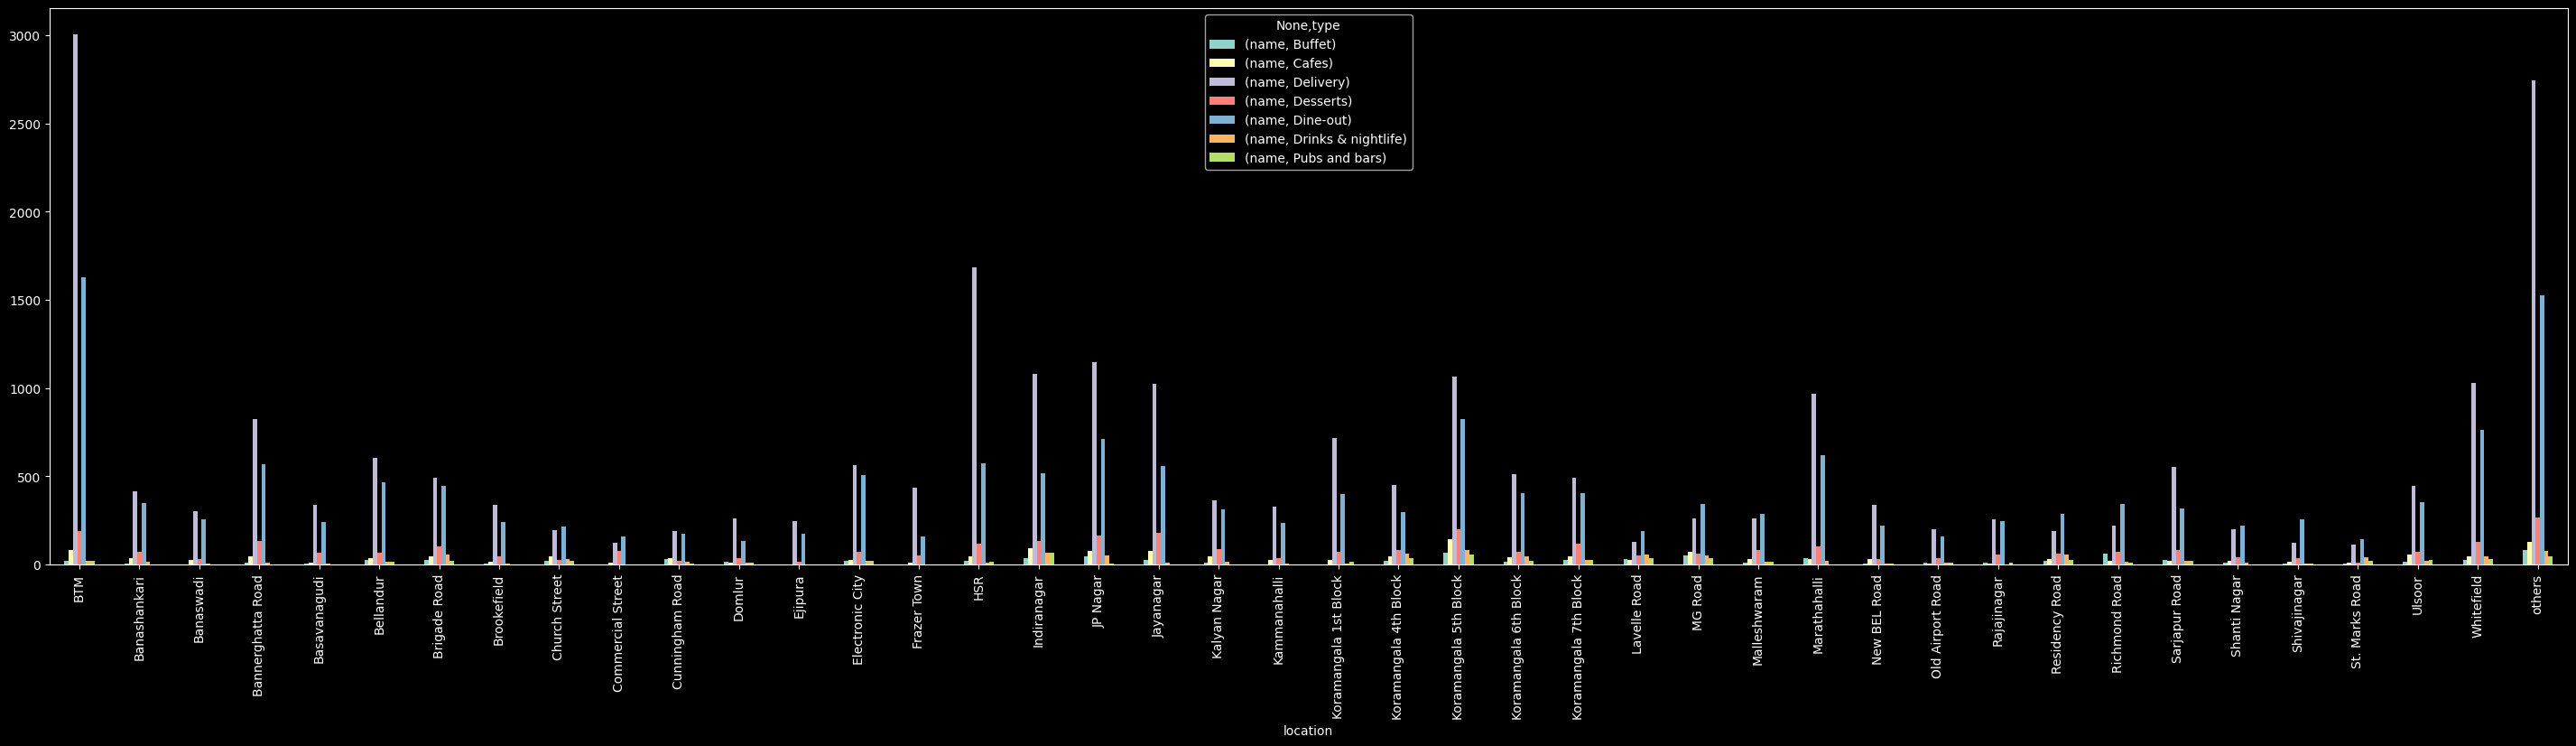

In [49]:
df3.plot(kind = 'bar', figsize = (36,8))